## Семинар 2.1 - Градиентный спуск и регуляризация


### План

1. Напоминание о задаче регрессии
    - Проблема большой выборки
    - Проблема выбора функции ошибки (Loss)
    - Проблема мультиколлинеарности признаков
    - Проблема переобучения
2. Регуляризация как способ борьбы с переобучением
    - L2-регуляризация (ridge)
    - L1-регуляризация (lasso) - отбор важнейших признаков
    -  Другие регуляризации
3. Принцип максимизации правдоподобия (likelyhood)
    - Гауссова вероятностная модель
    - Правдоподобие данных
    - Правдоподобие данных+модели
    - Вероятностный смысл регуляризации и важность нормировки данных
    - Погрешность параметров модели
5. Градиентный спуск - численный способ минимизации Loss-a. Простейший случай.
    - Общий алгоритм градиентного спуска
    - Стохастический градиентный спуск
6. Гиперпараметры и кросс-валидация
     - Grid search
     - Random search

### Задача регрессии (напоминание)

Напомним формулировку задачу регрессии (семинар 1.2).

Пусть имеем конечный набор точек $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$, причём  $x_i \in \mathbb{R}^m, y_i \in \mathbb{R}$. Хотим найти функцию $\check{y}$, наилучшим образом аппроксимирующий данный набор точек.

"Наилучшим" в плане какой-либо функции ошибки (Loss). Самой простой и широко-используемой является средний квадрат отклонений (MSE)

$$
MSE = \mathcal{L}\left(\check{y}_i, y_i\right)=\frac{1}{N} \sum_{i=1}^N\left(\check{y}_i-y_i\right)^2
$$

Также используется RSS - суммарный квадрат отклонений

$$
RSS = \sum_{i=1}^N\left(\check{y}_i-y_i\right)^2 = MSE \cdot N
$$

Функцию $\check{y}$ мы искали среди семейства линейных функций. Вводя матрицу "объекты-признаки":

$$
X=\left(\begin{array}{c}
x_1 \\
x_2 \\
\cdots \\
x_N
\end{array}\right)=\left(\begin{array}{ccc}
x_1^1 & \cdots & x_m^1 \\
\vdots & \ddots & \vdots \\
x_1^N & \cdots & x_m^N
\end{array}\right)
$$

наша модель выглядела как линейная комбинация столбцов этой матрицы с коэффициентами $w$:

$$
\check{y}_i=w_1 \cdot x_1^{:}+\cdots+w_m \cdot x_m^:=X \cdot\left(\begin{array}{c}
w_1 \\
\cdots \\
w_m
\end{array}\right)=X_{ij} \cdot w_j
$$

Также мы аналитически показали, что при выборе MSE или RSS, их минимизация достигается на столбце коэффициентов:

$$
\mathrm{W}_{\text {best }}=\left(\mathrm{X}^{\mathrm{T}} \cdot \mathrm{X}\right)^{-1} \cdot \mathrm{X}^{\mathrm{T}} \cdot \mathrm{Y}
$$

В то же время практически возникает некоторое количество проблем, связанных с этим методом решения задачи регрессии.

Во-первых, нам приходится обращать матрицу $(\mathrm{X}^{\mathrm{T}}\mathrm{X})^{-1}$, что является крайне дорогой операцией. При большом количестве имеющихся данных обращаемая матрица станет слишком большой, и нам может просто не хватить вычислительных ресурсов и времени на решение задачи.

Во-вторых, необходимо обосновать выбор такой функции ошибок (MSE или RSS), а также понять, как можно решать задачу регрессии с другими Loss-ми, при которых аналитическое решение получить невозможно.

В-третьих, если какие-либо два признака матрицы объекты-признаки получаются зависимыми, матрица $\mathrm{X}^{\mathrm{T}}\mathrm{X}$ становится необратимой - необходимо научиться отбрасывать лишние признаки.

И наконец, главная проблема, - переобучение. Для хорошей аппроксимации данных часто необходима достаточно сложная модель, однако переобучение нам сильно мешает - вместо того, чтобы приобретать обобщающую способность, сложные модели склонны к "зазубриванию" выборки, теряя всякую обобщающую способность.

Решением этих проблем сегодня и займёмся.

### Регуляризация как способ борьбы с переобучением

Характерной чертой переобучения являются резкие выбросы предсказаний модели на промежуточных или не лежащих в обучающей выборке иксах.

![original image](https://cdn.mathpix.com/snip/images/QIbA0QbBoSCXrglYsMtTzbN92zNhJzbJxAyUpCGKx3M.original.fullsize.png)


Наивно, эвристически, бороться с переобучением можно удаляя этот симптом. Иными словами, добавим в функцию ошибок слагаемое, отвечающие штрафу за такие скачки. 

$$
\mathcal{L} \rightarrow \mathcal{L}+R(w)
$$

Такой штраф должен ограничивать количество признаков (чтобы их не стало больше количества точек в train-е) или рост весов модели $w$ (чтобы функция не могла быстро осциллировать).

- __L2-регуляризация__

Таким образом, самой простой функцией регуляризации является просто квадрат нормы вектора весов модели $w$, также называемая __L2-регуляризация__ (__ridge__).

$$
R(w)=\tau\|w\|^2=\tau w^{T} w, \quad \tau > 0
$$

Здесь параметр $\tau$ отвечает "силе" регуляризации. Чем он больше, теми сильнее мы "штрафуем" модель за большие признаки.

Таким образом, модифицированный RSS, например, будет выглядеть как

$$
\mathcal{L}=\|X w-Y\|^2+\tau\|w\|^2
$$

Отметим, что в данном случае мы опять можем решить задачу аналитически, т.к. выбранная функция регуляризации дифференциируема.

$$
\frac{\partial \mathcal{L}}{\partial w}=2 X^{T}(X w-Y)+2 \tau w=0
$$

$$
2\left(X^{T} X+\tau \cdot \mathbb{1}\right) w=2 X^{T} Y
$$

$$
w_{best}=\left(X^{T} X+\tau \cdot \mathbb{1}\right)^{-1} X^{T} Y
$$

Видим, что при росте $\tau$ в обращаемой матрице растёт диагональ, что приводит к изменению её числа обусловленности. Как мы помним, число обусловленности напрямую влияет на эффективность и погрешность любых численных методов и чем оно меньше, тем лучше.

$$
\mu(X^TX)=\frac{\lambda_{\text {max }}}{\lambda_{\text {min }}} \rightarrow \frac{\lambda_{\text {max }}+\tau}{\lambda_{\text {min }}+\tau}
$$

Таким образом, чем меньше это выражениe, тем проще и точнее происходит обращение матрицы. Тем не менее, наша основная цель не эффективность обращения матрицы, а хорошая модель! Это значит, что параметр $\tau$ надо выбирать не из условия минимизации числа обусловленности, а из условия минимизации Loss-a.

Говорят, что $\tau$ - __гиперпараметр__ (внешний параметр), т.к. он не изменяется при обучении модели (процесса нахождения наилучшего $w$). Они напрямую влияют на качество обучения и итоговую модель. Как подбирать наилучшие значения гиперпараметров обсудим в конце семинара.

- __L1-регуляризация__

Иным выбором функции регуляризации может служить __L1-регуляризация__ (__lasso__). Вместо квадрата модуля, мы возьмём модуль вектора непосредственно.

$$
R(w)=\mu\|w\|_1=\mu \sum_{\alpha=1}^m\left|w_\alpha\right|, \quad \mu > 0
$$

Таким образом, новая функция ошибок будет выглядеть как

$$
\mathcal{L}=\left\|Xw-Y\right\|^2+\mu \sum_\alpha\left|w_\alpha\right|
$$

Отметим, что при данной регуляризации, функция ошибок недиффиренциируема в нуле и аналитическое решение получить можно, но крайне сложно и никто так не делает. Необходимо численно её минимизировать - как это делать обсудим позже в этом семинаре.

Тем не менее, данная регуляризация имеет существенное преимущество - вес признака $w_k$ может в определённый момент обнулиться, что отвечает неважности этого признака для модели. Т.е. данная регуляризация приводит к __отбору признаков__. Это позволяет избавляться от линейно-зависимых или бессмысленных признаков.

Чем больше гиперпараметр $mu$, тем больше признаков будет зануляться. При этом по мере роста $mu$ самые неинформативные признаки будут зануляться первыми. Этой процедурой можно отбирать самые важные признаки (коэффициенты модели).

-  __ElasticNet__

Иногда применяют комбинированный способ - сумма ridge и lasso. Такой регуляризатор называется __ElasticNet__. В среднем работает лучше.

$$
\mathcal{L} \rightarrow \mathcal{L}+\tau\|w\|^2+\mu \sum_\alpha\left|w_\alpha\right|
$$

Есть и другие регуляризации (см. документацию sklearn и лекцию).

- __Важность нормировки__

Отдельно отметим важность нормировки данных. Во всех приведённых регуляризаторах веса признаков одинаковы ($\tau$ и $\mu$) - таким образом нам важно нормировать входные данные для модели (и иксы, и игреки) - т.е. вычитать среднее и масштабировать к единичной дисперсии, чтобы регуляризатор "одинаково относился" ко всем признакам. Естественно при таком раскладе, мы как бы "шифруем" данные для модели и при получении предсказаний их надо обратно "дешифровать".

$$
x_i^{\prime}=\left(x_i-\bar{x}\right) / \sigma_x
$$




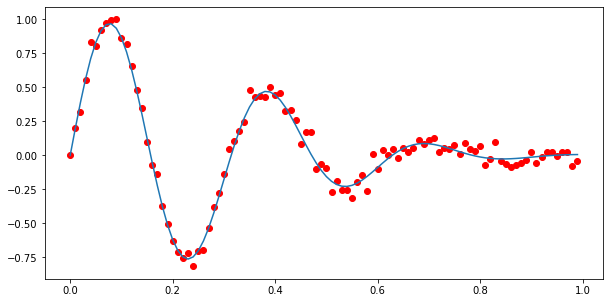

In [1]:
# L2 - регуляризация (ridge)

import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

xs = np.arange(0, 1, 0.01).reshape((-1, 1))
noise = np.random.normal(0., 0.05, size = xs.shape[0]).reshape((-1, 1))
ys = np.exp(-5*xs**2)*np.sin(20*xs) + noise

x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.33, random_state=42)

plt.figure(figsize=(10, 5))
plt.scatter(xs, ys, c="r")
plt.plot(xs, ys-noise)
plt.show()

In [2]:
def fit_Taylor_simple(x, y, max_order):
    model = LinearRegression(fit_intercept=False)
    X = x**(np.arange(max_order + 1))
    model.fit(X, y)
    return model

def fit_Taylor_ridge_regression(x, y, max_order):
    model = Ridge(alpha =1e-10, fit_intercept=False)
    X = x**(np.arange(max_order + 1))
    model.fit(X, y)
    return model

In [3]:
MAX_ORDER = 300

errors_simple = []
errors_ridge = []

orders = np.arange(MAX_ORDER+1)

for k in orders:
    
    model_simple = fit_Taylor_simple(x_train, y_train, k)
    y_test_predicted = model_simple.predict(x_test**(np.arange(k + 1)))
    errors_simple.append(mean_squared_error(y_test, y_test_predicted))
    
    model_ridge = fit_Taylor_ridge_regression(x_train, y_train, k)
    y_test_predicted = model_ridge.predict(x_test**(np.arange(k + 1)))
    errors_ridge.append(mean_squared_error(y_test, y_test_predicted))

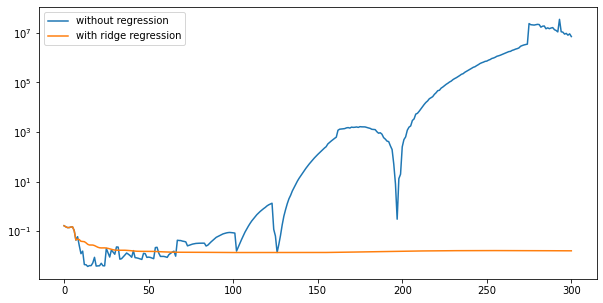

In [4]:
plt.figure(figsize=(10, 5))
plt.semilogy(orders, errors_simple, label="without regression")
plt.semilogy(orders, errors_ridge, label="with ridge regression")
plt.legend()
plt.show()

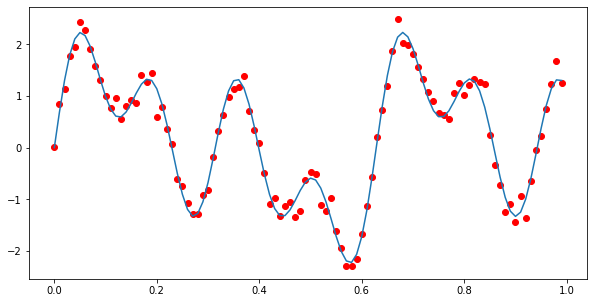

In [5]:
# L1 - регуляризация (lasso). Отбор признаков

xs = np.arange(0, 1, 0.01).reshape((-1, 1))
noise = np.random.normal(0., 0.2, size = xs.shape[0]).reshape((-1, 1))
ys = np.sin(20*xs) + np.sin(10*xs) + np.sin(40*xs) + noise

x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.33, random_state=42)

plt.figure(figsize=(10, 5))
plt.scatter(xs, ys, c="r")
plt.plot(xs, ys - noise)
plt.show()

In [6]:
def make_sin_matrix(x, max_order):
    X = np.ones(x.shape)
    for k in range(1, max_order + 1):
        X = np.concatenate([X, np.sin(k*x)], axis = 1)
    return X

def fit_sin_simple(x, y, max_order):
    model = LinearRegression(fit_intercept=False)
    X = make_sin_matrix(x, max_order)
    model.fit(X, y)
    return model

def fit_sin_lasso_regression(x, y, max_order):
    model = Lasso(alpha =1e-2, fit_intercept=False, max_iter=10000)
    X = make_sin_matrix(x, max_order)
    model.fit(X, y)
    return model

In [7]:
MAX_ORDER = 300

errors_simple = []
errors_lasso = []

orders = np.arange(MAX_ORDER+1)

for k in orders:
    
    model_simple = fit_sin_simple(x_train, y_train, k)
    y_test_predicted = model_simple.predict(make_sin_matrix(x_test, k))
    errors_simple.append(mean_squared_error(y_test, y_test_predicted))
    
    model_lasso = fit_sin_lasso_regression(x_train, y_train, k)
    y_test_predicted = model_lasso.predict(make_sin_matrix(x_test, k))
    errors_lasso.append(mean_squared_error(y_test, y_test_predicted))

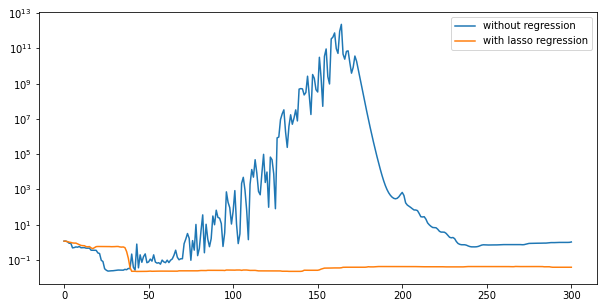

In [8]:
plt.figure(figsize=(10, 5))
plt.semilogy(orders, errors_simple, label="without regression")
plt.semilogy(orders, errors_lasso, label="with lasso regression")
plt.legend()
plt.show()

<AxesSubplot:>

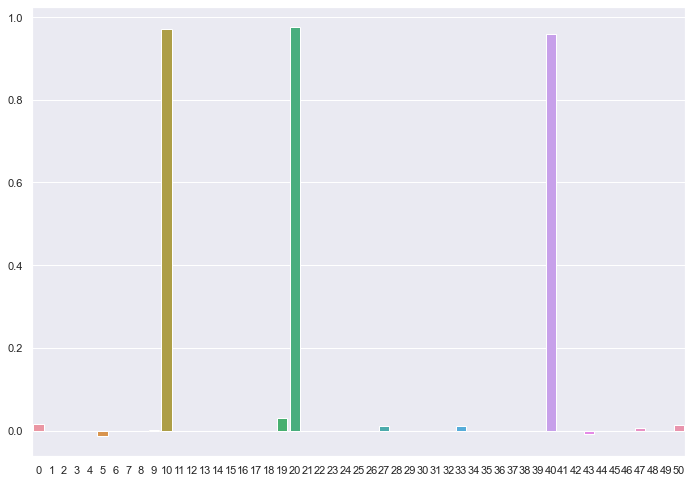

In [9]:
#!pip install seaborn
import seaborn as sns

model_lasso = fit_sin_lasso_regression(x_train, y_train, 50)
w = model_lasso.coef_ # т.к. pipeline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = list(range(len(w))), y = w)

### Принцип максимизации правдоподобия

Модели зависимости переменных также бывают вероятностные - это иной подход к решению задачи регрессии, основанный не на минимизации функции потерь, а на максимизации некоторого вероятностного правдоподобия модели.

В этом рассмотрении мы сможем дать вероятностное объяснение корректности решения задачи регрессии с использованием регуляризации. Это позволит также оценить случайную погрешность весов модели.

__Гауссова вероятностная модель__

Пусть нам дан набор точек $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$ и пусть их систематическая (приборная) погрешность равна нулю. Опять-таки надо найти наилучшую аппроксимирующую модель.

Как и раньше, будем решать эту задачу линейной регрессией. Пусть также наша модель отличается от истинных $y_i$ на некоторый шум

$$
y_i=X_{i \alpha} w_\alpha+\epsilon_i, \quad \epsilon_i \sim  \mathcal{N}\left(0, \sigma^2\right)
$$

Здесь $\epsilon_i$ - это случайный гауссов шум, объясняющий, почему исходные точки не лежат точно на нашей модели. Отметим, что $\sigma$ нам неизвестна, но одинакова для всех точек выборки. 

 __Принцип максимизации правдоподобия (likelyhood)__

В отличие от эмпирически выбранной функции потерь, будем пользоваться __принципом максимизации правдоподобия (likelyhood)__. Он заключается в максимизации вероятности пронаблюдать истинные $y_i$ в нашей нашей вероятностной модели.

Иными словами, нам надо подобрать такие $w$, чтобы вероятность $P_w(y)$ нашей модели $\check{y}_i=X_{i \alpha} w_\alpha$ с учётом шума $\epsilon_i$ выдать истинные $y_i$ была максимальной. При этом выборка фиксирована. Эта вероятность называется __правдоподобием данных__.

$$P_w(y) \rightarrow \max _w$$

Т.к. вероятность независимость событий есть произведение их вероятностей, суммарная верность будет большим произведением, что не очень удобно. Поэтому переходят к эквивалентной задаче, беря логарифм от этой вероятности (это эквивалентный шаг, т.к. максимизация $\log P_w(y)$ равносильна максимизации $P_w(y)$). Для удобства, эту штуку также называют правдоподобием.

$$\log P_w(y) $$

Распишем подробнее,

$$
P_w(y)=\prod_{i=1}^l \mathcal{N}\left(0, \sigma^2\right)\left[\epsilon_i\right]=\prod_{i=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{\left(y_i-X_{i \alpha} w_\alpha\right)^2}{2 \sigma^2}\right)
$$

Логарифмируем,

$$
\log P_w(y)=\sum_{i=1}^N\left\{-\frac{1}{2} \log 2 \pi \sigma^2-\frac{\left(y_i-X_{i\alpha} w_\alpha\right)^2}{2 \sigma^2}\right\} \rightarrow \max _w
$$

Заметим, что первые слагаемые от $w$ не зависят, а вторые слагаемые в этой сумме образуют сумму квадратов отклонений, т.е. они образуют функцию потерь в методе наименьших квадратов. Получается, что __МНК эквивалентен принципу максимизации правдоподобия с гауссовой вероятностной моделью__. Это и есть вероятностный смысл МНК. 

Отметим, что от $\sigma$ решение $w$ не зависит, как и в МНК - главное, чтобы она была одинаковой. Тем не менее, эту $\sigma$ можно оценить из

$$
\frac{\partial \log P_w(g)}{\partial \sigma^2}=-\frac{N}{\sigma^2}+\frac{1}{2 \sigma^4} \cdot R S S=0 \Rightarrow {\sigma}^2 =\frac{R S S}{N} = MSE
$$

Отметим, что есть более точные оценки, при которых для двух признаков (например для прямой $\check{y} = kx+b$ с признаками $k$ и $b$) оценка $\sigma$ будет

$$
\sigma = \frac{RSS}{N-2}
$$

А для общей задачи с количеством параметров $m$ (т.е. искомых весов $w_i$ коих также $m$ штук) оценка на случайную погрешность данных будет

$$
\sigma = \frac{RSS}{N-m}
$$

Остюда, при $N \gg m$ можно спокойно оценивать как $\sigma^2 \approx \frac{R S S}{N} = MSE$.

__Вероятностный смысл регуляризации__

Напомним, что такое условная вероятность:

$$
P(A \mid B)=\frac{P(A \cap B)}{P(B)}
$$


Перепишем наше правдоподобие в терминах условной вероятности. Действительно вероятность $P_w(y)$ по сути своей есть вероятность пронаблюдать $y$ при фиксированных $w$ и $x$:

$$
P_w(y)=P(y \mid w, x)
$$

Посмотрим на это со следующей точки зрения. До самого процесса максимизации правдоподобия, уже имелось некоторое распределение вероятности получить те или иные $w$ - __априорное распределение__ (до процесса измерения $w$). Действительно, вероятность получить крайне большие $w$ крайне мала для любой задачи. Обозначим это априорное распределение как $p_\gamma(w)$, где $\gamma$ - некоторые гиперпараметры.

Т.к. мы ввели функцию распределения, мы обязаны трактовать $w$ как случайные величины. Таким образом в такой трактовке мы обязаны максимизировать __правдоподобие данных и модели__. Обозначим её за $\widetilde{P}(y, w \mid x)$ и тогда,

$$
\widetilde{P}(y, w \mid x)=P(y \mid x, w) \cdot p_\gamma(w)=P_w(y) \cdot p_\gamma(w)
$$

Логарифмируя,

$$
\log \widetilde{P}(y, w \mid x)=\log P_w(y) + \log p_\gamma(w) = \text { const по }w-\frac{1}{2 \sigma^2} \mathcal{L}+\log p_\gamma(w)\rightarrow \max _w
$$

А отсюда уже видно, что выбор подходящего априорного распределения $p_\gamma(w)$ и даёт нам нужную функцию потерь! Иначе говоря, регуляризация - это лишь постулирование, что $w$ до процесса измерения имеют некоторое распределение  $p_\gamma(w)$, отвечающее выбранной регуляризации. Проиллюстрируем это.

Если взять  $p_\gamma(w)$ как гауссово распределение, мы получим L2-регуляризацию:

$$
p_\gamma\left(w_\alpha\right)=\frac{1}{\sqrt{2 \pi \gamma}} e^{-\frac{w_\alpha^2}{2 \gamma}}
$$

$$
\log p_\gamma=\text{const по $w$} -\frac{w_\alpha^2}{2 \gamma}
$$

$$
\log \widetilde{P}(y, w \mid x)= \text { const по }w-\frac{1}{2 \sigma^2} \left( \mathcal{L}-w_\alpha^2\frac{\sigma^2}{\gamma} \right)\rightarrow \max _w
$$

Откуда видим, что в прежних обозначениях $\tau = \frac{\sigma^2}{\gamma}$.

Аналогично, L1-регуляризация получается из распределения Лапласа $p_ \gamma\left(w_\alpha\right)=\frac{1}{2 \gamma} e^{-\frac{\left|w_\alpha\right|}{\gamma}}$.

Опять таки видим одинаковый масштаб для всех весов $w$ - т.е. важно нормировать данные! Иначе, мы бы сразу неявно воспринимали некоторые признаки более важными, чем другие.

__Погрешности коэффициентов линейной регрессии__

На лекциях также выводятся оценки для погрешностей весов линейной регрессии. Случайная погрешность получается из

$$
\Delta_{\text{случ}} w_\alpha=\sqrt{\frac{\left(X^{T} X\right)^{-1}_{ \alpha \alpha }\cdot R S S}{N}}
$$

А систематическая (приборная), при погрешности отдельного измерения $\Delta y = S$ , получилась

$$
\Delta_{\text{сист}} w_\alpha=\sqrt{\left(X^{T} X\right)^{-1}_{ \alpha \alpha }\cdot  S^2}
$$

Итого, суммарная погрешность будет (здесь берём корень из суммы квадратов, т.к. работаем с вероятностями, а не с максимальными оценками)

$$
\Delta w_\alpha=\sqrt{\left(X^{T} X\right)_{\alpha \alpha}^{-1} \cdot\left(S^2+MSE\right)}
$$

###  Градиентный спуск - численный способ минимизации Loss-a

Напомним, что градиент функции нескольких переменных - это вектор направления наибольшего роста функции.

Как мы уже поняли, аналитически решать задачу регрессии не всегда получается эффективно, если вообще получается. Таким образом, нам надо научится численно минимизировать функцию потерь. Простейший и самый распространённый способ это сделать заключается в применении __градиентного спуска__.

Продемонстрируем на примере решении задачи линейной регрессии с MSE Loss и регуляризатором ElasticNet. Она не решается аналитически, и необходимо численно минимизировать

$$
\mathcal{L}(w)=\frac{1}{N} \sum_{i=1}^{N}\left( X_{i \alpha} w_\alpha-y_i\right)^2+\tau \sum_{i=1}^N w_i^2+\mu \sum_{i=1}^N\left|w_i\right|
$$

$$
\mathcal{L}(w) \longrightarrow \min _w
$$

Общий __алгоритм градиентного спуска__ будет следующим образом:



>0. Фиксируем малый $\varepsilon$ - условие остановки алгоритма.
>
>1. Выберем начальное приближение $w^{(0)} \in \mathbb{R}^m$. Как правило, инициализируют случайным образом.

>2. Каждую последующую точку выбираем в направлении обратном градиенту $\mathcal{L}$ - таким образом мы двигаемся в направлении минимизации $\mathcal{L}$.
>$$w^{(n+1)}_k=w^{(n)}_k-\alpha \cdot  \left.\frac{\partial \mathcal{L}(w)}{\partial w_{k}}\right|_{w^{(n)}} $$ 

>Здесь $\alpha$ - так называемый шаг градиентного спуска (или __learning rate__). Если он будет слишком большим, мы не упадём в минимум и будем туда-сюда скакать около него. Если он будет слишком маленьким, мы рискуем так и не дойти до минимума. Таким образом, он является подбираемым гиперпараметром.

>3. Если на каком-то шаге получилось, что

>$$|\mathcal{L}(w^{(n+1)}) - \mathcal{L}(w^{(n)})| < \varepsilon$$

>То алгоритм останавливается и последнее получившееся $w_{final}=w^{(n+1)}$  принимается за окончательный ответ. Иначе на шаг 2.



Стоит отметить, что по хорошему, надо строить зависимость $\mathcal{L}(n)$. Т.к. для произвольной функции или для данных гиперпараметров алгоритм может и не сойтись. В идеальном случае, это будет монотонно стремящаяся к нулю функция. В плохом - сильно осциллирующая краказябра.


Естественно, это самая простая реализация градиентного спуска. Её можно существенно улучшить различными приёмчиками. В частности, learning rate можно сделать зависимым от $n$. К примеру,

$$
\alpha(n) = \frac{1}{n} 
$$

Если же мы попали в точку, где градиента не существует (что крайне маловероятно, т.к. их мера нуль), то можно просто взять любое небольшое направление сдвига, чтобы из неё выйти - хорошим ориентром будет градиент в близкой точке, в которой функция дифференциируема.

__Стохастический градиентный спуск__

Часто функция потерь - это сумма большого числа слагаемых. Если обучающая выборка достаточно велика, вычислять эту сумму будет проблематично и затратно - градиентный спуск будет работать крайне медленно. 

Решить эту проблему помогает стохастический градиентный спуск. Его идея - вычислять градиент функции потерь на каждом шаге алгоритма не по всей выборке, а по некоторой подвыборке (__batch__), которая будет меняться каждый шаг.

Если старый градиент рассчитывался по всей выборке

$$
\nabla \mathcal{L}=\frac{1}{N} \sum_{i=1}^N\left(\nabla \mathcal{L}_i\right)
$$

то на batch-е размером $B \ll N$ градиент не должен сильно поменяться

$$
\nabla \mathcal{L} \approx \frac{1}{B} \sum_{i=1}^B\left(\nabla \mathcal{L}_i\right) 
$$

Иными словами, мы "нарезаем" нашу обучающую выборку из $N$ элементов на $N/B$ кусков, на каждом из которых вычисляем градиент поочередно. Таким образом вся обучающая выборка используется, но нам нет необходимости суммировать огромное количество слагаемых для одного шага алгоритма. 

Один проход по всей выборке называется __эпохой__. После окончания эпохи (прохода по всей выборке) можно опять "нарезать" выборку на $N/B$ частей случайным образом (чтобы исключить какие-либо корреляции) и повторять процесс. В таком случае, как правило, строят зависимость $\mathcal{L}$ от $k$-ой эпохи.

Понятно, что процесс будет стохастическим, и на каждом шаге алгоритма мы будем чутка отклоняться от направления на минимум. Тем не менее, этот шум даже полезен, т.к. он помогает не проваливаться в узкие локальные минимумы - эмпирический факт :).

### Гиперпараметры и кросс-валидация

Наконец, обcудим процесс подбора гиперпараметров. Тут всё просто - перебираем какое-либо количество гиперпараметров по сетке (__grid-search__) или случайным образом (__random-search__), считаем кросс-валидацией Loss на каждой точке перебора, а в конце выбираем наилучший набор гиперпараметров. 

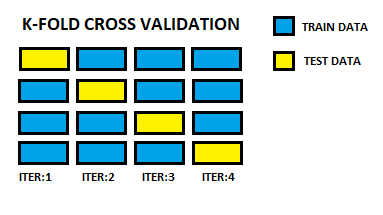

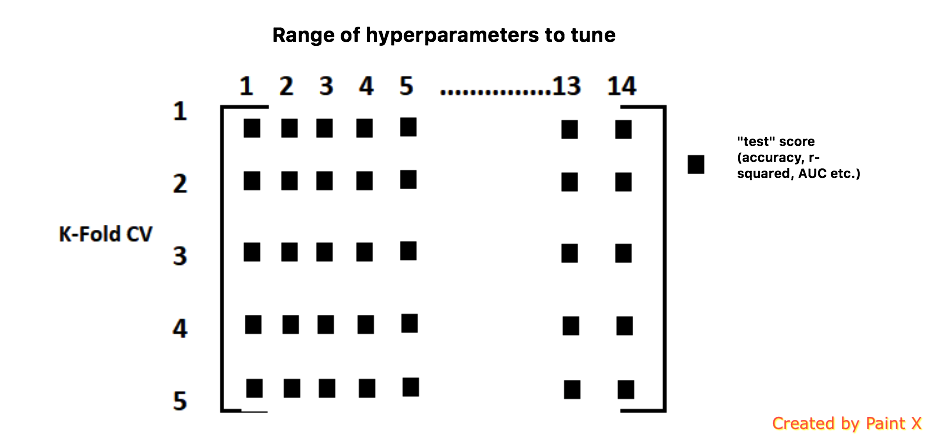

C:\Users\rfrel\AppData\Local\Temp\ipykernel_6884\3944412315.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


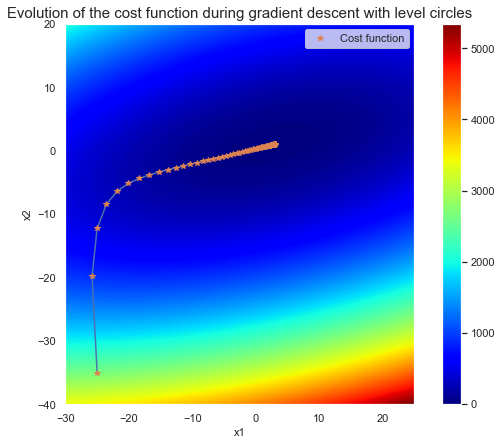

In [10]:
# Реализация градиентного спуска
# Ищем минимум следующей функции

def f(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)

def gradient(x1, x2):
    return np.array([-2 + x1 - x2, -2 - x1 + 5*x2])

def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return np.sqrt(N)

x1, x2 = -25, -35
alpha = 0.1
epsilon = pow(10,-6)

grad_f = gradient(x1, x2)
n_grad = norm(grad_f)

i = 1
evolution_X1_X2 = [[x1, x2]]
while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + alpha*direction[0], x2 + alpha*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i += 1
    
evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]


x1 = np.linspace(-30, 25, 150)
x2 = np.linspace(-40, 20, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

fig = plt.figure(figsize = (10,7))
plt.grid(False)
plt.imshow(Z, extent = [-30,25,-40,20], origin = 'lower', cmap = 'jet', alpha = 1)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Cost function")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

In [11]:
#scipy.optimize.minimize - универсальное решение для поиска минимума функции

In [12]:
# Кросс-валидация гиперпараметров - 

hyperparams = {'alpha': [10000, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9], 
               'max_iter': [1000, 10000, 100000]}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=Lasso(fit_intercept=False), 
                      param_grid=hyperparams, 
                      cv=5,
                      verbose=1,
                      scoring='neg_mean_squared_error', 
                      return_train_score=True)



In [13]:
from sklearn.metrics import get_scorer_names
#get_scorer_names()

In [14]:
# Возьмём ту же функцию
xs = np.arange(0, 1, 0.01).reshape((-1, 1))
noise = np.random.normal(0., 0.2, size = xs.shape[0]).reshape((-1, 1))
ys = np.sin(20*xs) + np.sin(10*xs) + np.sin(40*xs) + noise


gs.fit(make_sin_matrix(xs, 50), ys)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.794e-02, tolerance: 1.158e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e-02, tolerance: 1.281e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e+00, tolerance: 1.158e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.334e+00, tolerance: 1.281e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.488e+00, tolerance: 1.320e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+00, tolerance: 1.158e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+00, tolerance: 1.158e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+00, tolerance: 1.281e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\rfrel\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=5, estimator=Lasso(fit_intercept=False),
             param_grid={'alpha': [10000, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                   1e-06, 1e-07, 1e-08, 1e-09],
                         'max_iter': [1000, 10000, 100000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [15]:
gs.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [16]:
gs.best_score_

-0.07025956401491491

In [17]:
import pandas as pd

results = pd.DataFrame(gs.cv_results_['params'])
results['test_score'] = gs.cv_results_['mean_test_score']

results

,alpha,max_iter,test_score
0,1.000000e+04,1000,-1.490549
1,1.000000e+04,10000,-1.490549
2,1.000000e+04,100000,-1.490549
3,1.000000e-01,1000,-0.298109
4,1.000000e-01,10000,-0.298109
5,1.000000e-01,100000,-0.298109
6,1.000000e-02,1000,-0.070260
7,1.000000e-02,10000,-0.070260
8,1.000000e-02,100000,-0.070260
9,1.000000e-03,1000,-0.129816
